In [4]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Import the data into train_data
train_data= pd.read_excel(r'/Users/akhilareddyy/Desktop/Airlines Price Prediction/Data_Train.xlsx')

In [6]:
#Check if data is imported correctly
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
#Get the information of the data.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### CHECKING FOR MIISING VALUES:

    After loading it is important to check null values in a column or a row,
    If it is present then following can be done.
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well

In [8]:
#Check for Null Values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#check for that particular row
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
#Drop all the null values in the data
train_data.dropna(inplace=True)

In [11]:
#Check if the null values are dropped
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Pre-process & Perform Featurization of "Date_of_Journey"
    ie pre-process it & extract day,month,year from "Date_of_Journey" feature.

In [12]:
#Create a copy of the train_data
data_copy = train_data.copy()

In [13]:
data_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
#Define a function to convert column type to DatetimeIndex

def change_into_datetime(col):
    data_copy[col] = pd.to_datetime(data_copy[col])

In [15]:
#Call the function for required columns

for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [16]:
#Verify the Datatypes
data_copy.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
#Extracting Day, Month, Year and Create a new Columns for each.

data_copy['Journey_Day']= data_copy['Date_of_Journey'].dt.day
data_copy['Journey_Month']= data_copy['Date_of_Journey'].dt.month
data_copy['Journey_Year']= data_copy['Date_of_Journey'].dt.year

In [18]:
data_copy.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-09 05:50:00,2023-06-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [19]:
#Drop the Date_of_Jouney Column

data_copy.drop('Date_of_Journey', axis=1, inplace= True )

In [20]:
data_copy.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-09 05:50:00,2023-06-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


## Lets try to clean Dep_Time & Arrival_Time & featurize it.

In [21]:
#Create a function to extract hour, minute of time and create new column for each.
def extract_date_hour_min(df, col):
    df[col+' hour']= df[col].dt.hour
    df[col+' minute']= df[col].dt.minute
    df.drop(col, axis=1, inplace= True)
    return df.head(2)

In [22]:
#Getting hour, minutes for Departure time with above defined function.
extract_date_hour_min(data_copy,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time hour,Dep_Time minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [23]:
#Getting hour, minutes for Arrival time
extract_date_hour_min(data_copy,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time hour,Dep_Time minute,Arrival_Time hour,Arrival_Time minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [24]:
### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def depart_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else : return 'Late Night'


In [25]:
df = data_copy['Dep_Time hour'].apply(depart_time).value_counts().reset_index()
df.columns = ['departed_time', 'count']

In [26]:
df

,departed_time,count
0,Early Morning,2880
1,Evening,2357
2,Morning,2209
3,Noon,1731
4,Night,1040
5,Late Night,465


In [27]:
!pip install plotly

In [28]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [29]:
#Interactive Bargraph for count of flights for each departed time.
fig = go.Figure()
fig.add_trace(go.Bar(x=df['departed_time'], y=df['count'],
                     marker_color='#1f77b4', hoverinfo='text',
                     hovertext=df['count'].apply(lambda x: f"Count: {x:,}")))

fig.update_layout(title='Departed Time Distribution',
                  xaxis_title='Departed Time',
                  yaxis_title='Count')

fig.show()

## Pre-process Duration & extract meaningful features

In [30]:
def fill_duration(x):
    if 'h' not in x:
        x ='0h '+x
    elif 'm' not in x:
        x =x+' 0m'
    return x

In [31]:
data_copy['Duration']= data_copy['Duration'].apply(fill_duration)

In [32]:
data_copy['Duration'][2]

'19h 0m'

In [33]:
#New column for Duration hours
data_copy['duration_hours'] = data_copy['Duration'].apply(lambda x:int(x.split(' ')[0][:-1]))

In [34]:
#New Column for Duration Minutes
data_copy['duration_minutes'] = data_copy['Duration'].apply(lambda x:int(x.split(' ')[1][:-1]))

In [35]:
data_copy.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time hour,Dep_Time minute,Arrival_Time hour,Arrival_Time minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


In [36]:
#create new column to get total_duration in minutes
data_copy['Total_Duration']= data_copy['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [38]:
data_copy.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time hour,Dep_Time minute,Arrival_Time hour,Arrival_Time minute,duration_hours,duration_minutes,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


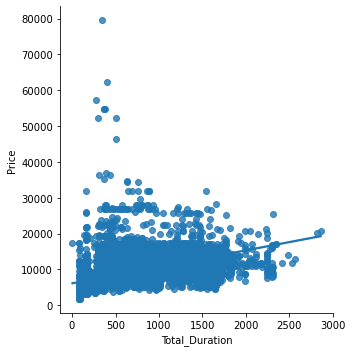

In [39]:
## It Plots data and regression model fits across a FacetGrid (combination of 'regplot` and :class:`FacetGrid)
## its a extended form of scatter plot.

sns.lmplot(x='Total_Duration', y='Price', data=data_copy)

## From graph it is pretty clear that, as the duration of minutes increases Flight price also increases.

<AxesSubplot:ylabel='Destination'>

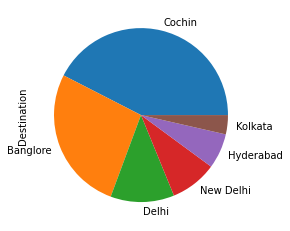

In [40]:
#Pie plot to understand the proportion of flights for each destination
data_copy['Destination'].value_counts().plot(kind='pie')

#Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected

## Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights
    

In [41]:
#On which route Jet Airways is extremely used???
data_copy[data_copy['Airline']=='IndiGo'].groupby('Route').size().sort_values(ascending=False)

Route
BLR → DEL                483
CCU → BLR                320
DEL → BOM → COK          302
DEL → HYD → COK          196
BOM → HYD                195
MAA → CCU                184
DEL → COK                 59
DEL → BLR → COK           57
CCU → MAA → BLR           37
DEL → MAA → COK           34
CCU → HYD → BLR           32
CCU → BBI → BLR           19
DEL → HYD → MAA → COK     18
BLR → HYD → DEL           18
DEL → LKO → COK           17
DEL → PNQ → COK           12
CCU → PNQ → BLR           11
CCU → PAT → BLR           10
CCU → NAG → BLR            9
BLR → IDR → DEL            5
DEL → BBI → COK            5
BLR → BOM → DEL            4
CCU → GAU → BLR            3
DEL → AMD → COK            3
BLR → NAG → DEL            3
BLR → LKO → DEL            3
BLR → AMD → DEL            3
DEL → TRV → COK            2
BLR → STV → DEL            2
BLR → GOI → DEL            1
CCU → VTZ → BLR            1
BOM → GOI → HYD            1
CCU → IXA → BLR            1
CCU → BOM → BLR            1
BLR → MA

## Airline vs Price Analysis
    -finding price distribution & 5-point summary of each Airline.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

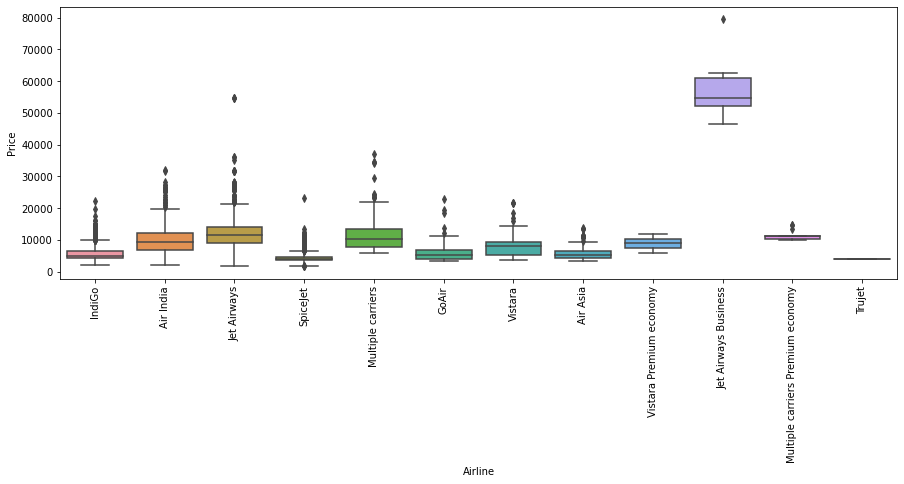

In [42]:
#Boxplots for pricing of each AIrlines
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data_copy)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

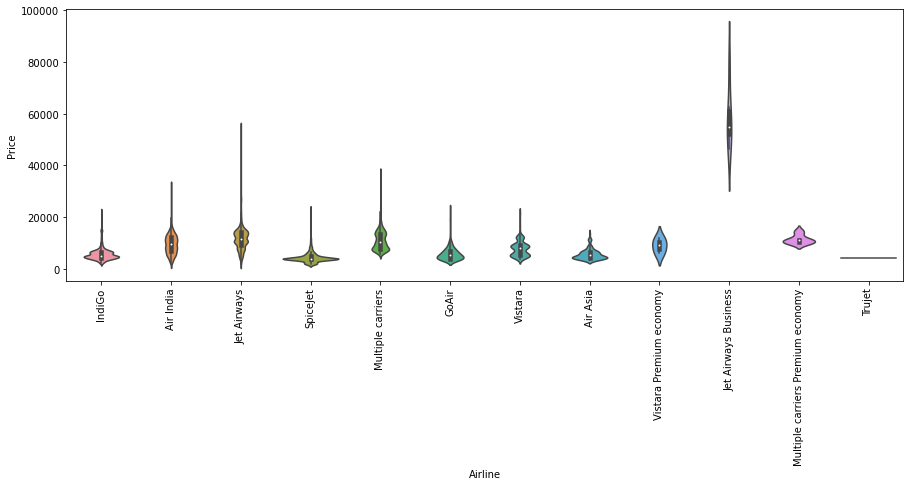

In [43]:
#ViolinPlots for pricing of each of the Airlines
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data_copy)
plt.xticks(rotation='vertical')

## Feature Encoding on Data

In [44]:
#understand the data in Additional Info
np.round(data_copy['Additional_Info'].value_counts()/len(data_copy)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [45]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-processed that column
# lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
# Drop journey_year as all the values in the column is 2019

data_copy.drop(columns=['Additional_Info','Route','Total_Duration','Journey_Year'],axis=1,inplace=True)

In [46]:
data_copy.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time hour,Dep_Time minute,Arrival_Time hour,Arrival_Time minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25


## Lets separate categorical data & numerical data

In [47]:
#Categorical Data
cat_col= [col for col in data_copy.columns if data_copy[col].dtype == 'object']

In [48]:
#Numerical Data
num_col = [col for col in data_copy.columns if data_copy[col].dtype != 'object']

In [49]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [50]:
num_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time hour',
 'Dep_Time minute',
 'Arrival_Time hour',
 'Arrival_Time minute',
 'duration_hours',
 'duration_minutes']

## Handling Categorical Data
    We can use 2 basic Encoding Techniques to convert Categorical data into some numerical format:
    if data belongs to Nominal data (ie data is not in any order) -->>OneHotEncoder is used 
    if data belongs to Ordinal data (ie data is in order ) -->> LabelEncoder is used 

In [51]:
#One-Hot Encoding for Source column
for category in data_copy['Source'].unique():
    data_copy['Source_'+category]= data_copy['Source'].apply(lambda x: 1 if x==category else 0)

In [52]:
data_copy.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time hour,Dep_Time minute,Arrival_Time hour,Arrival_Time minute,duration_hours,duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


## Performing Target Guided Mean Encoding !
    We can use One-hot , but if we have more sub-categories , it creates curse of                 dimensionality in ML..
    so use Target Guided Mean Encoding in order to get rid of this.

In [53]:
#Sort airlines according to mean price
airlines=data_copy.groupby(['Airline'])['Price'].mean().sort_values().index

In [54]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [55]:
#Create a dictionary 
Dict1= {key:index for index,key in enumerate(airlines,0)}

In [56]:
Dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [57]:
#Map Airlines with values in above dictionary
data_copy['Airline']= data_copy['Airline'].map(Dict1)

In [58]:
data_copy['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [59]:
data_copy['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [60]:
#Change New Delhi too Delhi in destination column
data_copy['Destination'].replace('New Delhi','Delhi',inplace=True)

In [61]:
data_copy['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [62]:
#Mean Encoding with Destination as well
dest=data_copy.groupby(['Destination'])['Price'].mean().sort_values().index

In [63]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [64]:
#Create new Dictionary destination as keys
Dict2= {key:index for index,key in enumerate(dest,0)}

In [65]:
Dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [66]:
data_copy['Destination']= data_copy['Destination'].map(Dict2)

In [67]:
data_copy['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [68]:
data_copy['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

## Manual Encoding

In [70]:
#Create a new dictionary for total_stops as keys
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [72]:
#Map the values on stops dictionary to all values in Total_stops column

data_copy['Total_Stops']=data_copy['Total_Stops'].map(stops)

In [73]:
data_copy['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

## Outlier Detection

In [76]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3, kde=False)

/Users/akhilareddyy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/akhilareddyy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/akhilareddyy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogr

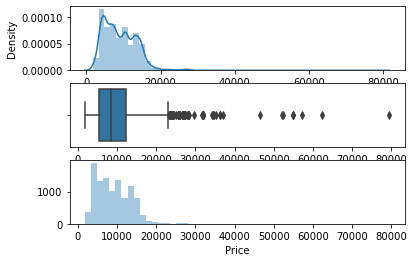

In [77]:
plot(data_copy,'Price')

In [78]:
#Replacing the values with Median
data_copy['Price']= np.where(data_copy['Price']>=35000,data_copy['Price'].median(),data_copy['Price'])

/Users/akhilareddyy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/akhilareddyy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



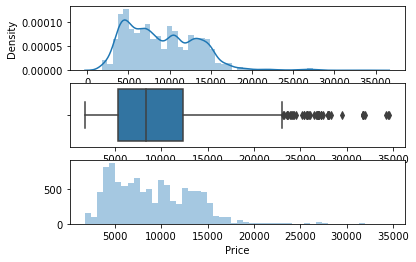

In [79]:
plot(data_copy,'Price')

In [80]:
#Dropping Source and Destination columns as they are encoded
data_copy.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [81]:
data_copy.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_Day              int64
Journey_Month            int64
Dep_Time hour            int64
Dep_Time minute          int64
Arrival_Time hour        int64
Arrival_Time minute      int64
duration_hours           int64
duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [82]:
from sklearn.feature_selection import mutual_info_regression

## Feature Selection

In [84]:
y=data_copy['Price']

In [85]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [86]:
X=data_copy.drop(['Price'],axis=1)

In [87]:
X.head(2)

,Airline,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Time hour,Dep_Time minute,Arrival_Time hour,Arrival_Time minute,duration_hours,duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,1,0,0,0


In [88]:
#computes the mutual information between each feature in X and the target variable y.
##Mutual information is a measure of the statistical dependency between two variables. 
mutual_info_regression(X,y)

array([0.97749498, 0.98970329, 0.79429613, 0.19625239, 0.25403294,
       0.34287038, 0.24667875, 0.40534783, 0.35080525, 0.46660927,
       0.33835472, 0.37859366, 0.4587904 , 0.51605078, 0.13877244,
       0.21007648])

In [89]:
#create a new Dataframe for these values with column name 'Importance'
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [90]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.001934
Airline,0.970981
Total_Stops,0.794866
Source_Delhi,0.519378
duration_hours,0.464785
Source_Kolkata,0.457557
Arrival_Time hour,0.406938
Source_Banglore,0.387968
Arrival_Time minute,0.360260
duration_minutes,0.347498


## Building Machine Learning Model

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
#Split the Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
#Building random Forest Model
Rf_model=RandomForestRegressor()

In [98]:
model=Rf_model.fit(X_train,y_train)

In [99]:
#Predict Values with Random Forest Model
y_pred=model.predict(X_test)

In [100]:
y_pred

array([16752.64,  6239.81,  8957.09, ...,  3555.47,  6342.2 ,  7044.13])

## Automate ML Pipeline

In [102]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9520290775614811
Predictions are : [16793.17  6333.99  8839.53 ...  3532.83  6449.92  7028.28]


r2_score: 0.8048231768157678
MSE :  3799624.257721077
MAE :  1185.98897264267
RMSE :  1949.26249071824
MAPE :  13.292613590552977


/Users/akhilareddyy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



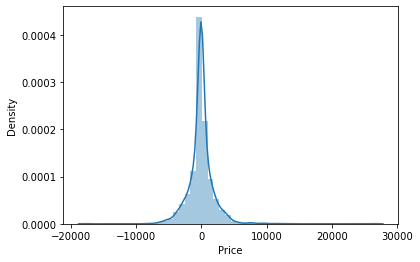

In [103]:
predict(RandomForestRegressor())

## Hypertune the ML Model

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [106]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [107]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [108]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [109]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [110]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [111]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=1200; total time=   7.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=1040; total time=   5.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=10, n_estimators=1080; total time=   5.3s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=1040; total time=  11.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=1200; total time=   7.4s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=1040; total time=   5.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=15, n_estimators=1120; total time=   5.7s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=1040; total time=  12.0s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [112]:
### to get your best model..
rf_Random.best_params_

{'n_estimators': 1160,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [113]:
pred2=rf_Random.predict(X_test)

In [114]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8286126739424744

[CV] END max_depth=13, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   4.6s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=1160; total time=  15.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   4.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=1120; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=15, n_estimators=1120; total time=   5.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1000; total time=   3.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1040; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1040; total time=   2.9s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=1160; tota